# Classification and Regression Trees (CART)

<center><img src='https://github.com/muscak/Master-Machine-Learning-Algorithms/blob/master/Nonlinear-Algorithms/CART/decision-tree.png?raw=1' width='250' alt='Simple Decision Tree'></img></center>

Decision tree learning is a supervised learning approach used in statistics, data mining and machine learning. In this formalism, a classification or regression decision tree is used as a predictive model to draw conclusions about a set of observations.

Tree models where the target variable can take a discrete set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees[[1]](https://en.wikipedia.org/wiki/Decision_tree_learning).



## Table of Contents

## Introductions<a id='introduction'></a>

Hyper parameter tuning

## Import Libraries<a id='libraries'></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
sb.set_style('whitegrid')
sb.despine(offset=10, trim=True);

<Figure size 432x288 with 0 Axes>

## Load Sample Data<a id='sampledata'>

In [3]:
x1 = [2.771244718, 1.728571309, 3.678319846, 3.961043357, 2.999208922, 7.497545867, 9.00220326, 7.444542326, 10.12493903, 
      6.642287351]
x2 = [1.784783929, 1.169761413, 2.81281357, 2.61995032, 2.209014212, 3.162953546, 3.339047188, 0.476683375, 3.234550982, 
      3.319983761]
y = [0, 0, 0, 0,0, 1, 1, 1, 1, 1]

df_train = pd.DataFrame(zip(x1, x2, y), columns=['x1', 'x2', 'y'])

df_train

,x1,x2,y
0,2.771245,1.784784,0
1,1.728571,1.169761,0
2,3.678320,2.812814,0
3,3.961043,2.619950,0
4,2.999209,2.209014,0
5,7.497546,3.162954,1
6,9.002203,3.339047,1
7,7.444542,0.476683,1
8,10.124939,3.234551,1
9,6.642287,3.319984,1


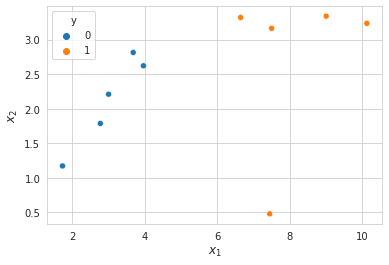

In [4]:
sb.scatterplot(data=df_train, x='x1', y='x2', hue='y')
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.show()

## Manual Implementation of CART<a id='manual'></a>

The CART model is learned by looking for split points in the data. A split point is a single value of a single attribute. Partitioning data at a split point involves separating all data at that node into two groups, left of the split point and right of the split point.

### Gini Index Cost Function
$$G = \sum\limits_{k=1}^{n}p_k \times (1-p_k)$$

Where $G$ is the Gini index over all classes, $p_k$ are the proportion of training instances with class $k$. A node that has all classes of the same type (perfect class purity) will have G = 0, where as a G that has a 50-50 split of classes for a binary classification problem (worst purity) will have a G = 0.5. Therefore, the **Gini Index** is **the most important component** for the performance of a classification and regression tree.

In [5]:
def calculate_gini(df_train, split):
    df = df_train.copy()
    # Split the data to the right and left 
    df['Group'] = ''
    df.loc[df['x1'] < split, 'Group'] = 'LEFT'
    df.loc[df['x1'] >= split, 'Group'] = 'RIGHT'

    # Calculate class counts
    left_0 = len(df[(df['Group'] == 'LEFT') & (df['y'] == 0)])
    left_1 = len(df[(df['Group'] == 'LEFT') & (df['y'] == 1)])

    right_0 = len(df[(df['Group'] == 'RIGHT') & (df['y'] == 0)])
    right_1 = len(df[(df['Group'] == 'RIGHT') & (df['y'] == 1)])

    right = right_0 + right_1
    left = left_0 + left_1
    
    # print the counts to the screen
    print(pd.pivot_table(data=df.drop('x2', axis=1), index='y', columns='Group', aggfunc='count', 
               margins=True, margins_name='Sum', fill_value=0))
    
    # Calculate Gini Index
    g_left_0 = left_0 / left
    print('\nLeft 0: ', g_left_0)
    g_left_1 = left_1 / left
    print('Left 1: ', g_left_1)

    g_right_0 = right_0 / right
    print('Right 0: ', g_right_0)
    g_right_1 = right_1 / right
    print('Right 1: ', g_right_1)

    ## Calculating weights
    w_left = left / (left + right)
    print('\nWeight Left: ', w_left)
    w_right = right / (left + right)
    print('Weight Right: ', w_right)

    g_left = (1 - (np.square(g_left_0) + np.square(g_left_1))) * w_left
    print('\nGini LEFT: ', g_left)
    g_right = (1 - (np.square(g_right_0) + np.square(g_right_1))) * w_right
    print('Gini RIGHT: ', g_right)
    gini = g_left + g_right
    print('\n---------------------------')
    print('Gini: ', gini)

In [6]:
# In our study we'll use the first value of x1 as a first split point
split1 = df_train.loc[0, 'x1']
calculate_gini(df_train, split1)

        x1          
Group LEFT RIGHT Sum
y                   
0        1     4   5
1        0     5   5
Sum      1     9  10

Left 0:  1.0
Left 1:  0.0
Right 0:  0.4444444444444444
Right 1:  0.5555555555555556

Weight Left:  0.1
Weight Right:  0.9

Gini LEFT:  0.0
Gini RIGHT:  0.4444444444444444

---------------------------
Gini:  0.4444444444444444


In [7]:
split2 = df_train['x1'].iloc[-1]

In [8]:
calculate_gini(df_train, split2)

        x1          
Group LEFT RIGHT Sum
y                   
0        5     0   5
1        0     5   5
Sum      5     5  10

Left 0:  1.0
Left 1:  0.0
Right 0:  0.0
Right 1:  1.0

Weight Left:  0.5
Weight Right:  0.5

Gini LEFT:  0.0
Gini RIGHT:  0.0

---------------------------
Gini:  0.0


In [9]:
def predict(df_test, split):
  df = df_test.copy()
  # Predicting by comparing the split value to the x1
  df['Prediction'] = ''
  df.loc[df['x1'] < split, 'Prediction'] = 0
  df.loc[df['x1'] >= split, 'Prediction'] = 1

  # Calculate the error
  df['Error'] = ''
  df.loc[df['Prediction'] == df['y'], 'Error'] = 0
  df.loc[df['Prediction'] != df['y'], 'Error'] = 1

  print(df)

  # Calculating the accuracy metric
  acc = (1 - (df['Error'].sum() / len(df['Error']))) * 100

  return acc


### Create a test dataset

In [10]:
x1_test = [2.343875381, 3.536904049, 2.801395588, 3.656342926, 2.853194386, 8.907647835, 9.752464513, 
           8.016361622, 6.58490395, 7.142525173]
x2_test = [2.051757824, 3.032932531, 2.786327755, 2.581460765, 1.052331062, 3.730540859, 3.740754624, 
           3.013408249, 2.436333477, 3.650120799]
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
df_test = pd.DataFrame(zip(x1_test, x2_test, y), columns=['x1', 'x2', 'y'])

### Make prediction on test dataset

In [11]:
# We'll use the second split value as it has better class purity than the first split value
acc = predict(df_test, split2)

print('\n\n------------------------------------')
print('Accuracy: {:.0f}%'.format(acc))

         x1        x2  y Prediction Error
0  2.343875  2.051758  0          0     0
1  3.536904  3.032933  0          0     0
2  2.801396  2.786328  0          0     0
3  3.656343  2.581461  0          0     0
4  2.853194  1.052331  0          0     0
5  8.907648  3.730541  1          1     0
6  9.752465  3.740755  1          1     0
7  8.016362  3.013408  1          1     0
8  6.584904  2.436333  1          0     1
9  7.142525  3.650121  1          1     0


------------------------------------
Accuracy: 90%


In [12]:
# Let's see what would be the accuracy score if we used the first split option
acc = predict(df_test, split1)

print('\n\n------------------------------------')
print('Accuracy: {:.0f}%'.format(acc))

         x1        x2  y Prediction Error
0  2.343875  2.051758  0          0     0
1  3.536904  3.032933  0          1     1
2  2.801396  2.786328  0          1     1
3  3.656343  2.581461  0          1     1
4  2.853194  1.052331  0          1     1
5  8.907648  3.730541  1          1     0
6  9.752465  3.740755  1          1     0
7  8.016362  3.013408  1          1     0
8  6.584904  2.436333  1          1     0
9  7.142525  3.650121  1          1     0


------------------------------------
Accuracy: 60%


#### 🔎 Remark

As expected the accuracy score of the first split value (60%) is lower than the second one (90%). The first split value has Gini Index of 0.444 and the second has the Gini Index of 0.0 value which is the purist value. 

## Using Sklearn

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [14]:
model = DecisionTreeClassifier()
x = df_train.drop('y', axis=1)
y = df_train['y']
model.fit(x, y)

DecisionTreeClassifier()

[Text(0.5, 0.75, 'x[0] <= 5.302\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]')]

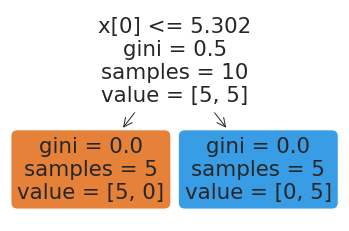

In [15]:
plot_tree(model, filled=True, rounded=True)

In [16]:
x_test = df_test.drop('y', axis=1)
y_hat = model.predict(x_test)

acc = accuracy_score(y_test, y_hat) * 100

print('Accuracy: {:.1f}%'.format(acc))

Accuracy: 100.0%


#### 🔎 Remark

The sklearn function provided a better accuracy score (100%) by finding/using split value of 5.302.

In [17]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:xlabel='Class', ylabel='count'>

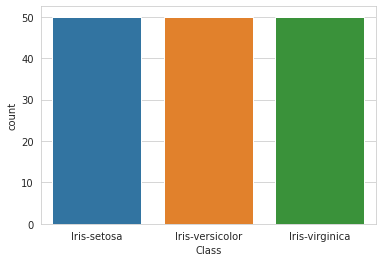

In [19]:
sb.countplot(x=dataset['Class'])

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
dataset['Class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class, dtype: int64

In [22]:
dataset.replace({'Class':{'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}}, inplace=True)

[Text(0.5, 0.9, 'petal-width <= 0.75\ngini = 0.666\nsamples = 120\nvalue = [40, 38, 42]\nclass = Iris-virginica'),
 Text(0.4230769230769231, 0.7, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = Iris-setosa'),
 Text(0.5769230769230769, 0.7, 'petal-width <= 1.75\ngini = 0.499\nsamples = 80\nvalue = [0, 38, 42]\nclass = Iris-virginica'),
 Text(0.3076923076923077, 0.5, 'petal-length <= 4.95\ngini = 0.139\nsamples = 40\nvalue = [0, 37, 3]\nclass = Iris-versicolor'),
 Text(0.15384615384615385, 0.3, 'petal-width <= 1.65\ngini = 0.054\nsamples = 36\nvalue = [0, 35, 1]\nclass = Iris-versicolor'),
 Text(0.07692307692307693, 0.1, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]\nclass = Iris-versicolor'),
 Text(0.23076923076923078, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-virginica'),
 Text(0.46153846153846156, 0.3, 'petal-width <= 1.55\ngini = 0.5\nsamples = 4\nvalue = [0, 2, 2]\nclass = Iris-versicolor'),
 Text(0.38461538461538464, 0.1, 'gini = 0.0\nsamples = 2\nvalue 

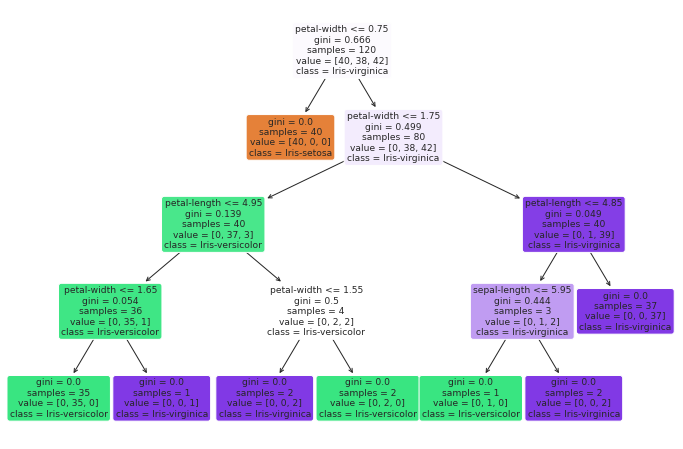

In [28]:
x = dataset.drop('Class', axis=1)
y = dataset['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=101)

model = DecisionTreeClassifier()
model.fit(x_train, y_train)
plt.figure(figsize=(12,8))
plot_tree(model, filled=True, rounded=True, feature_names=x.columns, class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

In [26]:
y_hat = model.predict(x_test)
acc = accuracy_score(y_test, y_hat) * 100
print('Accuracy score: {:.2f}%'.format(acc))

Accuracy score: 96.67%


### Hyperparameter Tuning

In [47]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [31]:
from sklearn.model_selection import GridSearchCV

In [55]:
# Defining the hyperparameters to bu used in grid search as a dictionary 
params = {
    'max_depth': [1, 2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 3, 5, 10, 20],
    'criterion': ['gini', 'entropy']
}

In [56]:
model = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=10, scoring='accuracy', verbose=1)

In [57]:
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 5, 10],
                         'min_samples_leaf': [1, 2, 3, 5, 10, 20]},
             scoring='accuracy', verbose=1)

In [58]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(max_depth=2)


In [63]:
print('Accuracy: {:.2f}%'.format(grid_search.best_score_ * 100))

Accuracy: 95.83%


[Text(0.4, 0.8333333333333334, 'petal-width <= 0.75\ngini = 0.666\nsamples = 120\nvalue = [40, 38, 42]\nclass = Iris-virginica'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = Iris-setosa'),
 Text(0.6, 0.5, 'petal-width <= 1.75\ngini = 0.499\nsamples = 80\nvalue = [0, 38, 42]\nclass = Iris-virginica'),
 Text(0.4, 0.16666666666666666, 'gini = 0.139\nsamples = 40\nvalue = [0, 37, 3]\nclass = Iris-versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.049\nsamples = 40\nvalue = [0, 1, 39]\nclass = Iris-virginica')]

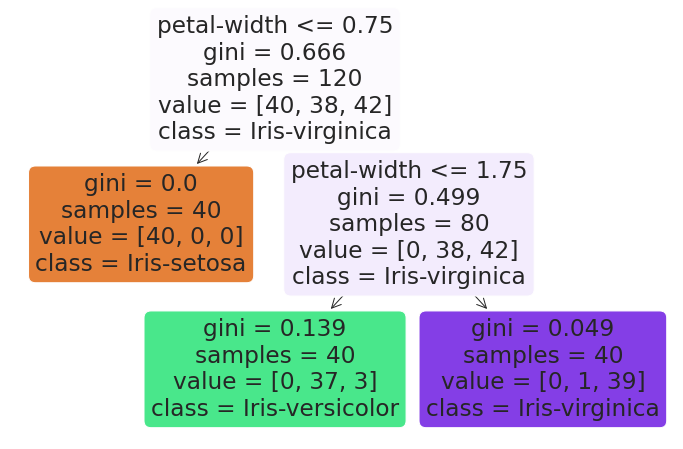

In [61]:
plt.figure(figsize=(12,8))
plot_tree(model, filled=True, rounded=True, feature_names=x.columns, class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

In [60]:
# Assigning hyperparameters that generates the best accuracy score to a new model to test the performance
#  on test dataset 
model_gs = grid_search.best_estimator_

In [62]:
y_hat = model_gs.predict(x_test)

acc = accuracy_score(y_test, y_hat) * 100
print('Acciracy: {:.2f}%'.format(acc))

Acciracy: 93.33%


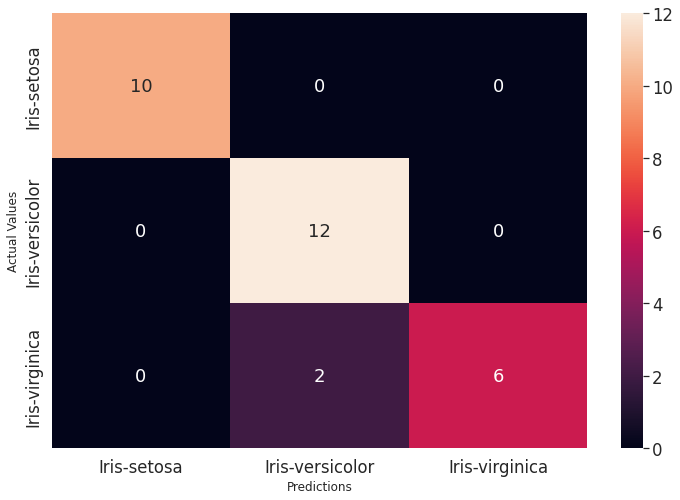

In [64]:
cm = confusion_matrix(y_test, y_hat)
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
pred_labels = [l for l in labels]
cm_df = pd.DataFrame(cm, index=labels, columns=pred_labels)

sb.set(font_scale=1.5)
plt.figure(figsize=(12,8))
sb.heatmap(cm_df, annot=True, fmt='d')
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actual Values', fontsize=12)
plt.show()